In [1]:
import datacube
from datacube.storage.masking import mask_invalid_data
from datacube.api.query import Query
dc = datacube.Datacube()

In [2]:
# Collect query parameters

nwt = False
vi = False

In [3]:
# Prepare the DB query

if nwt :
    lat = (62.3768, 63.3062)
    lon = (-114.7038, -112.3989)
elif vi :
    lat = (60.5044, 63.8342)
    lon = (-116.6982, -109.6388)
else :
    lat = (45.4499, 46.6034)
    lon = (-78.4944, -76.7130)    

    
LC08_Bands = ['coastal_aerosol', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'panchromatic', 'cirrus', 'lwir1', 'lwir2', 'quality']


query = { 
    'product' : 'LC08_scene'
    #, 'time' : ('2014','2015')
    , 'latitude' : lat
    , 'longitude' : lon
    , 'resolution' : (-0.0025, 0.0025)
}

In [4]:
# Explore the datacube for datasets of interest
dc.find_datasets(**query)

[Dataset <id=618fd894-abaf-540d-bf50-f00c75974d49 type=LC08_scene location=/data/datacube/in/landsat/LC08_L1TP_017028_20130809_20170309_01_T1/metadata.yaml>,
 Dataset <id=c07c4053-faca-5160-9e16-95f742cccae6 type=LC08_scene location=/data/datacube/in/landsat/LC08_L1TP_017028_20130926_20170308_01_T1/metadata.yaml>,
 Dataset <id=a3c3eb5a-a700-500b-985e-2f999b3eadb8 type=LC08_scene location=/data/datacube/in/landsat/LC08_L1TP_017028_20140711_20170304_01_T1/metadata.yaml>,
 Dataset <id=f208f14e-7e10-576a-a594-6d761d842d7e type=LC08_scene location=/data/datacube/in/landsat/LC08_L1TP_017028_20150916_20170225_01_T1/metadata.yaml>,
 Dataset <id=c41be1b9-f985-54c6-a6f9-353af4fb3840 type=LC08_scene location=/data/datacube/in/landsat/LC08_L1TP_017028_20170820_20170826_01_T1/metadata.yaml>]

In [10]:
# Query the datacube and load dataset to memory
data = dc.load( **query)

In [13]:
# Collect the bands for iteration
bands =[];
for d in data.data_vars:
    bands.append(data.data_vars[d].loc[ '1990' : '2018' ])

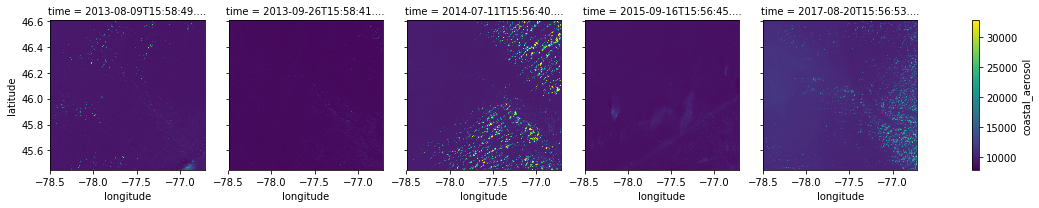

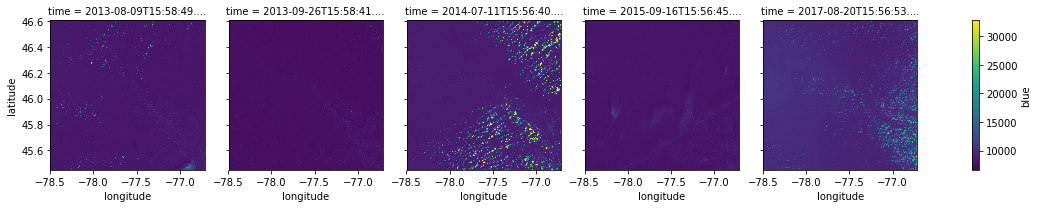

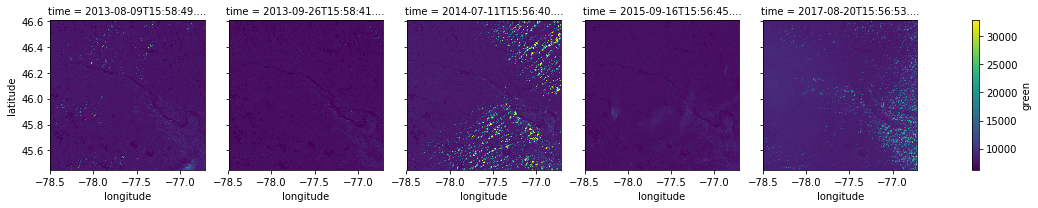

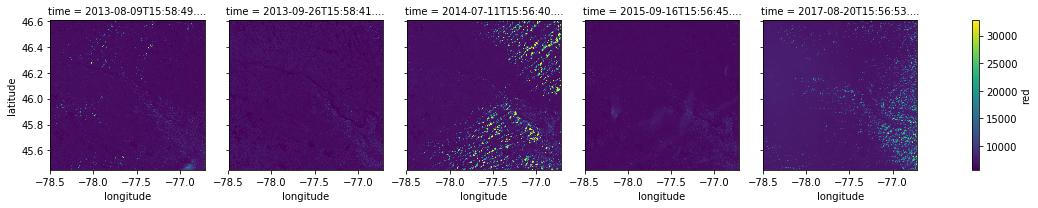

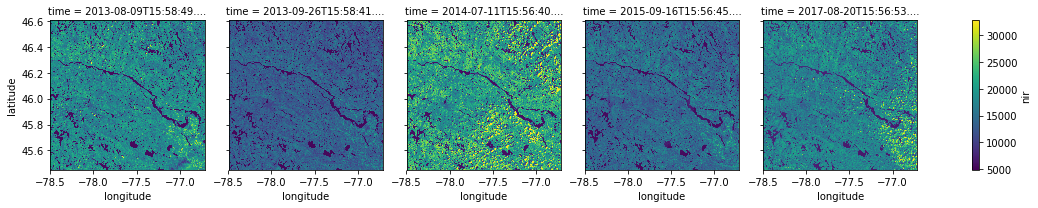

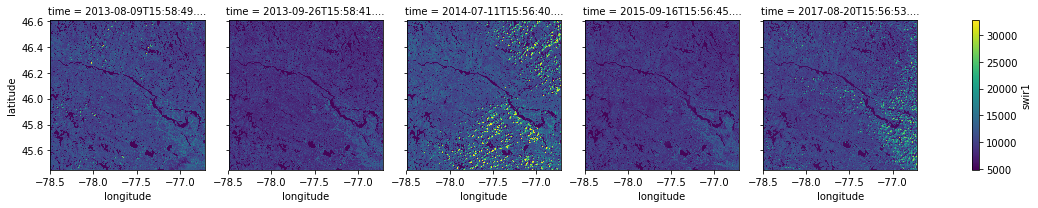

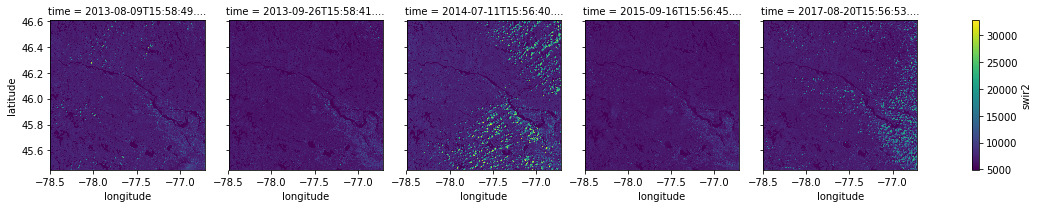

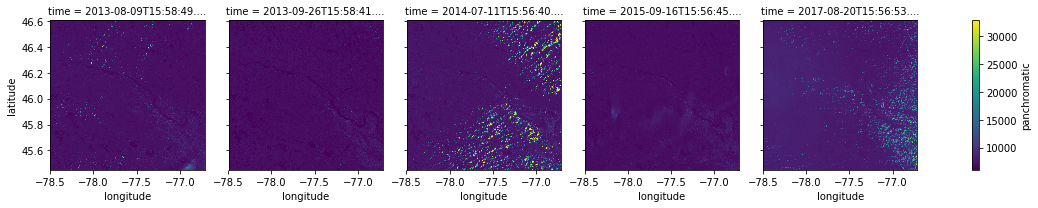

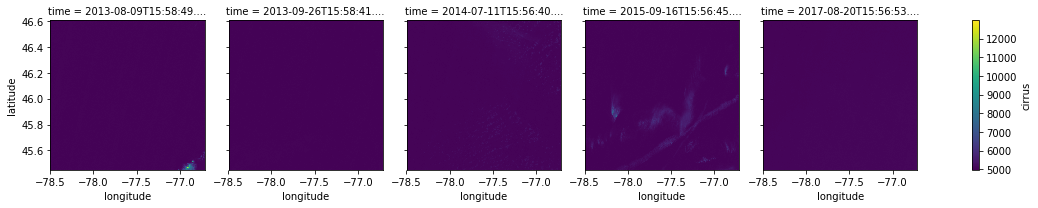

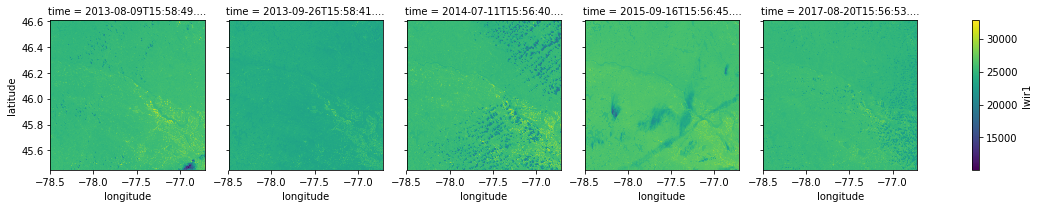

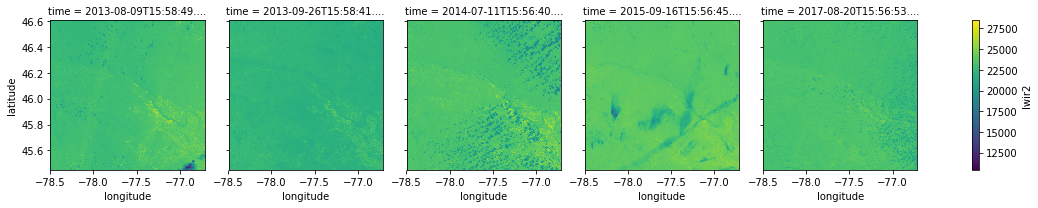

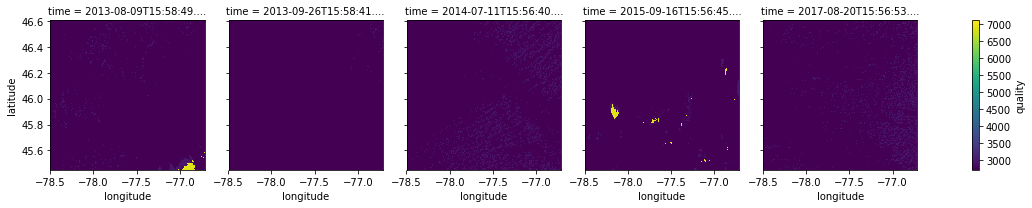

In [14]:
for curr in bands:
    curr.plot(col = 'time', size = 3)

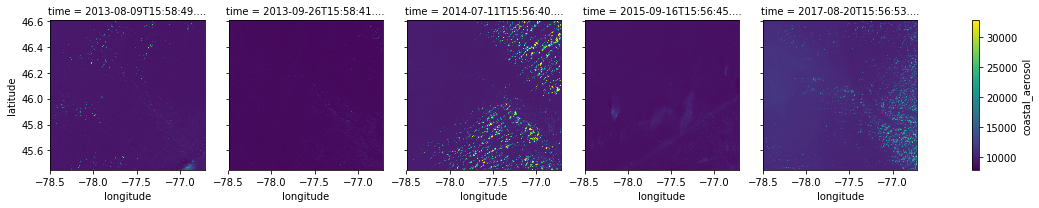

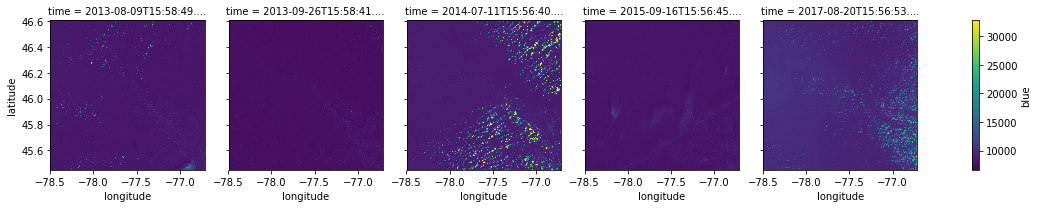

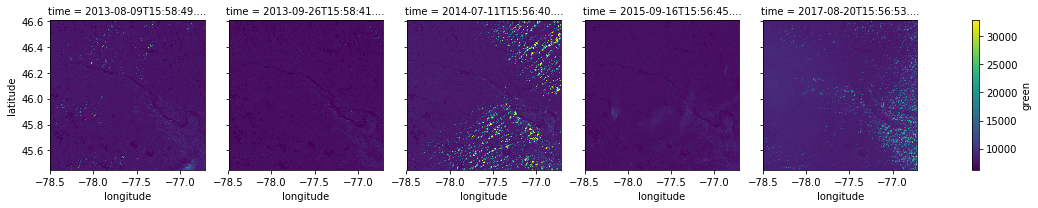

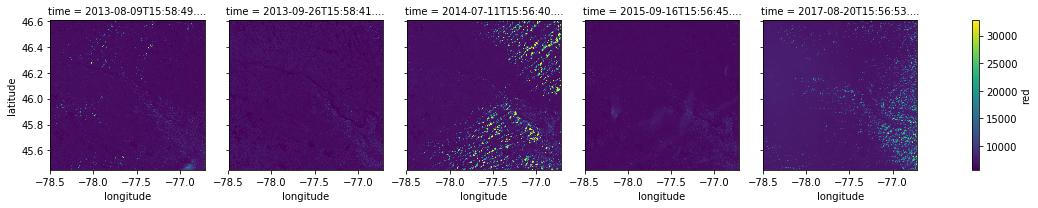

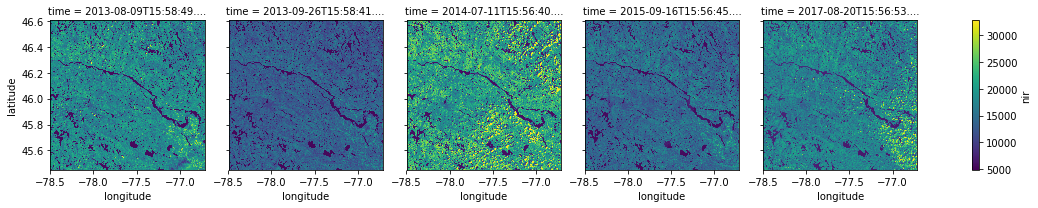

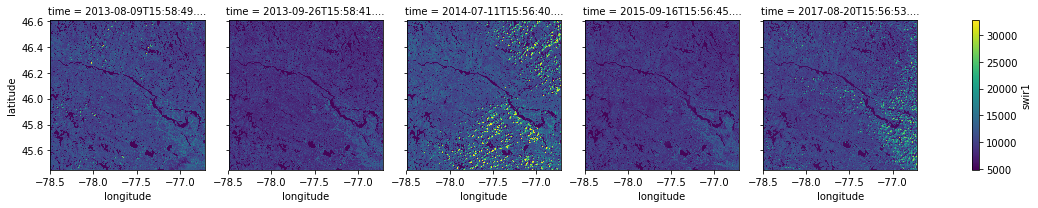

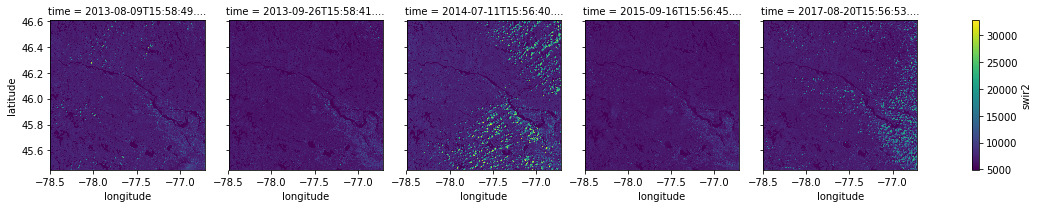

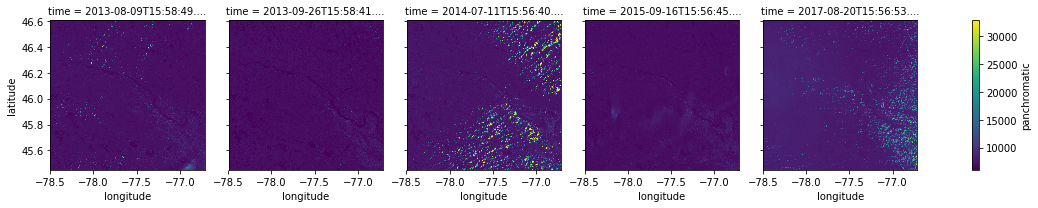

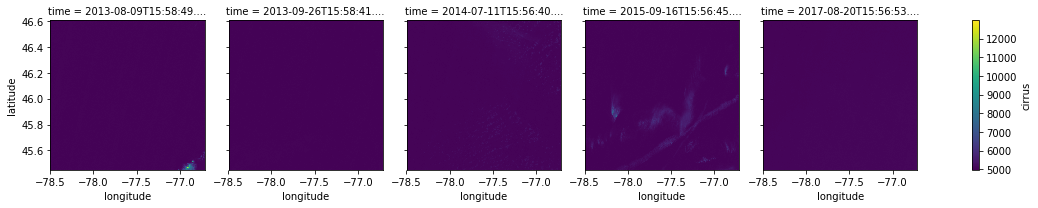

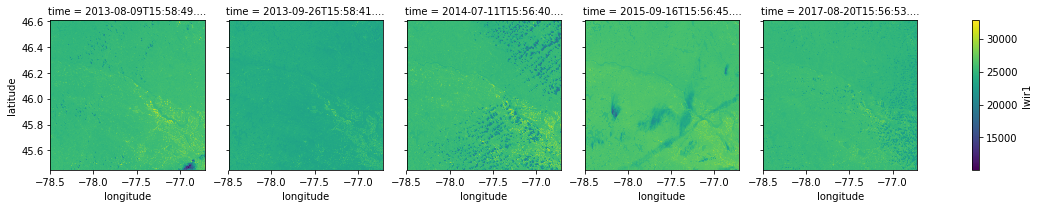

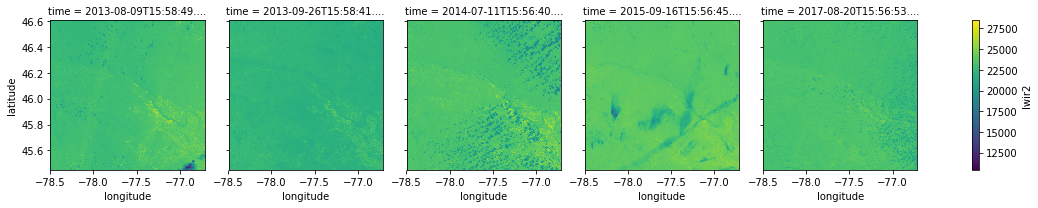

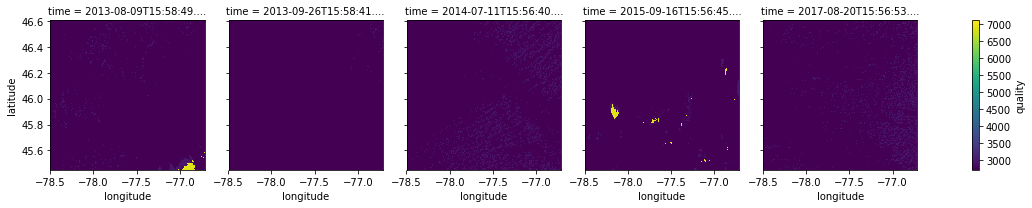

In [15]:
for curr in bands:
    curr.where(curr != curr.attrs['nodata']).plot(col = 'time', size = 3)